<center> <img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" align="center" width="960" height="480"/> </center>

<center><font color=#555555><font size=6> MAF1731 - Microstructure and Trading Systems </font> <br> <br>
    
<center><font color=#555555><font size=5> B.Eng Financial Engineering </font> <br> <br> <br> <br>

<center><font color=#6495ED><font size=3> I.F. Jesús Álvarez Castellanos  </font> <br> <br>
    
<center><font color=#6495ED><font size=3> I.F. Rodolfo Slay Ramos  </font> <br> <br>
    
<center><font color=#6495ED><font size=3> I.F. Esther Itzel Sanromán Santana  </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> Jun 2021 </a> | <font color= #555555> <font size = 4> Repository: <a href='hhttps://github.com/jesusalvarezc/FInal_Project'>Link</a></font>

<hr style="border:0.01in solid #FF8C90"> </hr>

<center> <font color= #1A5276> <font size = 8> Proyecto final </font> <br> <br> <font color= #1A5276> <font size = 5> Análisis fundamental del indicador Trade Balance  </font>

<hr style="border:0.01in solid #FF8C00"> </hr>

<br>

<font color= #555555> <font size = 4> Abstract </font>

<font color= #6B6B6B> <font size = 3>  Este laboratorio fue elaborado por Jesús Álvarez Castellanos, Rodolfo Slay Ramos e Itzel Sanromán Santana, es un trabajo hecho para la materia de Microestructura y Sistemas de Trading, la cual forma parte del curriculum de la licenciatura en Ingeniería Financiera en el ITESO. El propósito de este proyecto es analizar el comportamiento del MXN_USD durante el comunicado del indicador Trade Balance de la economía USA, este proyecto se divide en 3 secciones, aspectos financieros como volumen, takeprofit, stoploss; aspectos estadísticos como prueba de componente de autocorrelación y autocorrelación parcial, prueba de heterocedasticidad, prueba de normalidad y prueba de estacionalidad; y aspectos computacionales como el cálculo de 4 métricas basadas en 4 escenarios diferentes. </font>

<br>

# <font color= darkblue> 1. Introduction </font>

<hr style="border:0.01in solid #FF8C00"> </hr>

This is an introduction, normally, it is done at the very end, when all the other content in the notebook is completed but just before the abstract (which is short version of the introduction) ... 

# <font color= darkblue> 2. Install/Load Packages and Depedencies </font>

<hr style="border:0.01in solid #FF8C00"> </hr>

## <font color= #7FB3D5 > 2.2 Python Packages </font>

In order to run this notebook, it is necessary to have installed and/or have the _requirements.txt_ file with the following: 

- pandas>=1.1.1 
- numpy>=1.19.1
- jupyter>=1.0.0
- chart_studio>=1.1
- plotly>=4.14

## <font color= #7FB3D5> 2.3 Files Dependencies </font>

The following are the file dependencies that are needed to run this notebook:

- files/MXNUSD_2018.xlxs: Precios por minuto MXNUSD.
- files/MXNUSD_2019.xlxs: Precios por minuto MXNUSD.
- files/MXNUSD_2020.xlxs: Precios por minuto MXNUSD.
- files/Trade Balance - United States: Otros datos históricos

## <font color= #7FB3D5> 2.3 Install Packages</font>

In [1]:
%%capture

# Install all the pip packages in the requirements.txt
import sys
!{sys.executable} -m pip install -r requirements.txt

In [2]:
import data as dt
import functions as fn
import visualizations as vs

# <font color= darkblue> 3. Data Description </font>

<hr style="border:0.01in solid #FF8C00"> </hr>

In [3]:
ind = dt.f_leer_archivos("Trade Balance - United States.csv")
ind

,DateTime,Actual,Consensus,Previous,Revised
23,2018-03-07 13:30:00,-56.6,-55.1,-53.1,-53.9
22,2018-04-05 12:30:00,-57.6,-56.8,-56.6,-56.7
21,2018-05-03 12:30:00,-49.0,-50.0,-57.6,-57.7
20,2018-06-06 12:30:00,-46.2,-49.0,-49.0,-47.2
19,2018-07-06 12:30:00,-43.1,-43.7,-46.2,-46.1
18,2018-08-03 12:30:00,-46.3,-46.5,-43.1,-43.2
17,2018-09-05 12:30:00,-50.1,-50.1,-46.3,-45.7
16,2018-10-05 12:30:00,-53.2,-53.5,-50.1,-50.0
15,2018-11-02 12:30:00,-54.0,-53.6,-53.2,-53.3
14,2018-12-06 13:30:00,-55.5,-55.0,-54.0,-54.6


In [4]:
data = dt.f_leer_archivos_varios("MXNUSD_2018.csv", "MXNUSD_2019.csv", "MXNUSD_2020.csv")
data.head()

,timestamp,open,high,low,close,volume
0,2018-01-01 18:00:00,23.590469,23.596036,23.590469,23.596036,61
1,2018-01-01 18:01:00,23.590469,23.590469,23.590469,23.590469,22
2,2018-01-01 18:05:00,23.590469,23.590469,23.590469,23.590469,20
3,2018-01-01 18:07:00,23.584906,23.590469,23.584906,23.590469,12
4,2018-01-01 18:08:00,23.590469,23.596036,23.590469,23.596036,20


In [5]:
ind.iloc[0,0]

Timestamp('2018-03-07 13:30:00')

In [6]:
data.iloc[0,0]

Timestamp('2018-01-01 18:00:00')

In [7]:
a = dt.look_at_change(ind, data)
# a

In [8]:
a[list(a.keys())[0]]

,timestamp,open,high,low,close,volume
45493,2018-03-07 13:00:00,22.055580,22.060446,22.055580,22.055580,95
45494,2018-03-07 13:01:00,22.055580,22.065313,22.055580,22.065313,131
45495,2018-03-07 13:02:00,22.065313,22.070183,22.065313,22.070183,32
45496,2018-03-07 13:03:00,22.070183,22.075055,22.070183,22.070183,18
45497,2018-03-07 13:04:00,22.070183,22.075055,22.070183,22.075055,54
...,...,...,...,...,...,...
45549,2018-03-07 13:56:00,22.021581,22.021581,22.021581,22.021581,8
45550,2018-03-07 13:57:00,22.021581,22.021581,22.021581,22.021581,89
45551,2018-03-07 13:58:00,22.021581,22.021581,22.016733,22.016733,45
45552,2018-03-07 13:59:00,22.016733,22.016733,22.016733,22.016733,8


# <font color= darkblue> 4. A particular Process  </font>

<hr style="border:0.01in solid #FF8C00"> </hr>

## <font color= #7FB3D5> Etapa 2: Datos Históricos </font>

### <font color= #4682B4> Aspectos financieros </font>

La balanza comercial es un indicador económico que se obtiene de los datos sobre exportación e importación de bienes de consumo, es decir, los pagos al exterior del país y cobros desde dicho exterior.

La balanza comercial se puede expresar de dos maneras. Positiva: Cuando se exporta mayor cantidad de bienes y servicios de los que se importan, lo cual se denomina superávit comercial. Negativa: Cuando el valor de las exportaciones es menor que el de las importaciones, déficit comercial.

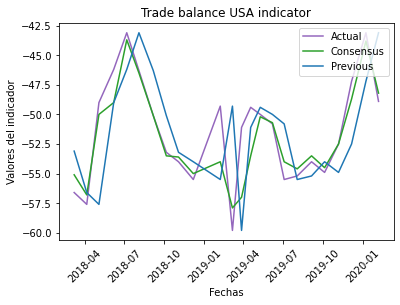

In [9]:
graf_ind = vs.graf_ind(ind)

En los siguientes momentos el número se acerca más a ser cero. Lo que se busca es que las exportaciones sean mayores que las importaciones, es por esto que mientras un valor sea positivo o más cercano a eso será bueno.

In [10]:
ind.DateTime[20]

Timestamp('2018-06-06 12:30:00')

In [11]:
ind.DateTime[12]

Timestamp('2019-03-06 13:30:00')

In [12]:
ind.DateTime[11]

Timestamp('2019-03-27 12:30:00')

In [13]:
ind.DateTime[5]

Timestamp('2019-09-04 12:30:00')

In [14]:
ind.DateTime[2]

Timestamp('2019-12-05 13:30:00')

### <font color= #4682B4> Aspectos estadísticos </font>

### <font color= #4682B4> Aspectos computacionales </font>

## <font color= #7FB3D5> Etapa 3: Programación </font>

Este proyecto aporta para la programación de la sistema de trading y garantiza la estructura de proyectos de python utilizada en laboratorios anteriores.

## <font color= #7FB3D5> Etapa 4: Optimización y Backtest </font>

Para la última etapa se necesita:
- Capital inicial: $100,000 $
- Riesgo máximo por operación (pérdida máximo): $1,000 $ usd
- Divide los datos de la siguiente manera:  
 * Periodo de entrenamiento: 01/ene/2018 - 01/ene/2019 
 * Periodo de prueba: 01/Feb/2019 - 01/Feb/2020

In [15]:
cap_inicial = 100000
max_loss = 1000


<br>

# <font color= darkblue> 6. Results </font>

<hr style="border:0.01in solid #FF8C00"> </hr>

In [16]:
# DELETE THIS CELL IN YOUR FILE

# In here you present the general results, and also, a discussion of such results.

<br>

# <font color= darkblue> 7. References </font>

<hr style="border:0.01in solid #FF8C00"> </hr>

[1] Munnoz, 2020. Python project template. https://github.com/iffranciscome/python-project. (2021).

</br>